Group Members: Marisa Long and Anna Schoeny\
**Link to Github**
# Exploratory Analysis of Alzheimer's Disease Datasets

### **Collaboration Plan**
Our team's meeting plan is to collaborate together once a week to keep up with the milestones for the final project. We plan to ideally meet in person late morning/early afternoon on Sundays. Meeting in person once a week will ensure that we are able to adequately communicate and delegate what each of us are working on and assist each other as necessary. We created a shared Github repository as our means of maintaining version control and collaboration for the project. The project board within our repository includes our to-do tasks so we are able to track our progress. 

### **Discussion of Datasets**
Our team is interested in working with datasets related to Alzheimer's disease measuring features of patients such as clinical dimension rating, years of education, normalized whole brain volume, age, socioeconomic status, and more. We are particularly interested in working with datasets relating to Alzheimer's because our families have both been personally impacted by the disease. We are currently considering working with two particular datasets that we have uncovered in our search. 

The first dataset that we are considering working with is [Alzheimer's Disease and Healthy Aging Indicators: Cognitive Decline](https://chronicdata.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Indicators-C/jhd5-u276) from the [Centers for Disease Control](https://www.cdc.gov/aging/index.html) (CDC). This dataset is a filtered version of a larger [Behavioral Risk Factor Surveillance System](https://www.cdc.gov/brfss/index.html) (BRFSS) dataset to include only information on mental decline relevant to our project. The BRFSS data includes data regarding health-related behaviors, chronic health dianoses, and the use of various health-related services. We are interested in using this dataset because the CDC has access to a large volume of data related to Alzheimer's, which will allow us to have a  broad view of the features we might be able to work with as we narrow down our project scope. Another interesting aspect of this dataset is that the CDC has recorded information regarding both healthy individuals and diseased individuals. Using this data, we are hoping to be able to answer 
- include one question we hope to answer with each dataset 

The second dataset that we are considering working with is [MRI and Alzheimer's](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers) taken from the [Open Access Series of Imaging Studies (OASIS)](http://www.oasis-brains.org/). This dataset includes MRI comparisons of adults with Alzheimer's and healthy adults. This dataset was initially interesting to our team because the this dataset has a high data usability score as assigned by Kaggle, which represents user ratings on the documentation of the data. This high score indicates that the data is in a state ready for our analysis. This dataset also includes both cross-sectional and longitudinal MRI data. The cross-sectional data highlights 416 subjects ranging from age 18 to 96 and details 3 to 4 MRI scans for each subject. Approximately $1\over4$ of the subjects had been diagnosed with Alzheimer's disease. The longitudinal data follows the same sample of 150 subjects aged 60 to 96. These subjects were scanned two or more times with at least a year between imaging sessions. 64 of the subjects were diagnosed with Alzheimer's disease by the time of the first scan with an additional 14 diagnosed at one of the later scan visits. 

#### REMINDER: 
Make sure to **PULL** before working. Also, **PUSH** work when you do something meaningful!

In [39]:
# this is just to double check that you are in the correct directory
!pwd

/Users/annaschoeny/Desktop/marisalong.github.io


In [108]:
# importing necessary libraries for the analyzing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset 1: Alzheimer's Disease and Healthy Aging Indicators: Cognitive Decline 
Data from the CDC's BRFSS

In [129]:
# Read in the data 
df_alhz_aging = pd.read_csv('./data/Alzheimer_s_Disease_and_Healthy_Aging_Indicators__Cognitive_Decline.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Cleaning Dataset 1 for Tidy Data:

To transform our data according to the Tidy Data principles we've learned in this course, we needed to fix the issue with columns 17 and 18 having inconsistent dtypes. We cast all values to floats (or np.nan). There were a number of columns that did not actually have any data stored in them, so we decided to get rid of those columns to clean up the dataframe further. Another issue we have had in terms of tidy data was that many of the columns were redundant and had the same information as another column. For the purposes of our project, we got rid of the columns we deemed redundant. Another example is that 'StratificationCategory2' included both Gender and Race/Ethnicity, so we wanted to separate these into two columns 'Gender' and 'Race/Ethnicity'. 

In [130]:
#Data Cleaning: Ensuring that columns 17 and 18 are only one type (float)

# Cleaning column 18 to make all data types floats
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].fillna(-1)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].astype(float)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace(-1, np.nan)

# Cleaning column 17 to make all data types floats
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].fillna(-1)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].astype(float)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace(-1, np.nan)

In [131]:
# Data Cleaning: Removing empty and redundant columns to clean up dataframe 
df_alhz_aging.drop(['Response','Sample_Size', 'StratificationCategory3', 'Stratification3', 'ResponseID', 
                    'StratificationCategoryID3', 'StratificationID3', 'StratificationCategoryID1', 'Report', 'DataValueTypeID', 'Data_Value_Type',
                   'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'], axis=1, inplace=True)

In [132]:
# Data Cleaning: Separating 'Stratification2' and 'StratificationCategory2' 
# into two columns for 'Race/Ethnicity' and 'Gender' and then delete original columns

df_alhz_aging['Gender'] = df_alhz_aging['Stratification2'].map({
    'Female': 'Female',
    'Male': 'Male'
})

df_alhz_aging['Race/Ethnicity'] = df_alhz_aging['Stratification2'].map({
    'White, non-Hispanic': 'White, non-Hispanic',
    'Hispanic': 'Hispanic',
    'Native Am/Alaskan Native': 'Native Am/Alaskan Native',
    'Black, non-Hispanic': 'Black, non-Hispanic',
    'Asian/Pacific Islander': 'Asian/Pacific Islander'
})

# Drop the original columns
df_alhz_aging.drop(['Stratification2', 'StratificationCategory2'], axis=1, inplace=True)


In [133]:
# Data Cleaning: Repeat above process but tidy up data from 'Stratification1' as well - turn into 'Age Group' column
df_alhz_aging['Age Group'] = df_alhz_aging['Stratification1'].map({
    'Overall': 'Overall',
    '50-64 years': '50-64 years',
    '65 years or older': '65 years or older'
})

# Drop the original columns 
df_alhz_aging.drop(['Stratification1', 'StratificationCategory1'], axis=1, inplace=True)

In [134]:
# Quick peak at dataframe
df_alhz_aging.head() 

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,ClassID,TopicID,QuestionID,LocationID,Gender,Race/Ethnicity,Age Group
0,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,C06,TCC04,Q42,1,NaN,Native Am/Alaskan Native,65 years or older
1,2015,2015,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,41.8,NaN,33.6,50.4,C06,TCC03,Q41,1,NaN,"White, non-Hispanic",50-64 years
2,2015,2020,AL,Alabama,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,39.3,NaN,30.5,48.7,C06,TCC03,Q41,1,Male,NaN,Overall
3,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,C06,TCC02,Q31,2,NaN,Asian/Pacific Islander,Overall
4,2020,2020,AK,Alaska,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,NaN,No Data Available,NaN,NaN,C06,TCC03,Q41,2,NaN,Asian/Pacific Islander,50-64 years


### Dataset 2: MRI and Alzheimer's
Data from OASIS project

In [11]:
# Read in the longitudinal data and take a peek
df_alhz_long = pd.read_csv('./data/oasis_longitudinal.csv')
df_alhz_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [12]:
df_alhz_long.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [13]:
# Looking at what type of patients make up this dataset

df_alhz_long['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [14]:
df_alhz_long['EDUC'].value_counts()

12    103
16     81
18     64
14     33
13     27
15     17
20     13
11     11
8       9
17      9
6       3
23      3
Name: EDUC, dtype: int64

#### What is the average level of education (variable 'EDUC') of demented vs non-demented vs converted individuals?

In [23]:
# Average Education level for demented individuals
df_alhz_long[df_alhz_long.Group == "Demented"].EDUC.mean()

13.67123287671233

In [24]:
# Average Education level for nondemented individuals
df_alhz_long[df_alhz_long.Group == "Nondemented"].EDUC.mean()

15.142105263157895

In [25]:
# Average Education level for converted individuals
df_alhz_long[df_alhz_long.Group == "Converted"].EDUC.mean()

15.45945945945946

One hypothesis we have based on this brief summary of education level is that education slows cognitive decline. This is suppored by the data above, where demented individuals have and average of 13.7 years, nondemented individuals have an average of 15.1 years, and converted individuals have 15.5 years.

#### How are education and socioeconomic status related in this sample?

In [26]:
df_alhz_long["EDUC"].corr(df_alhz_long["SES"])

-0.7226472777909818

At first glance, a strong negative correlation between education level and socioeconomic status was suprising. However, when we read the publication that came out alongside this dataset, they authors explained that 'SES' is ranked using the Hollingshead Index of Social Position and has 1 being the highest status, where 5 is the lowest. Therefore, this statistic shows that individuals from a higher socioeconomic status were likely to recieve more education than those of lower socioeconomic statuses. 

#### How old were people in this dataset when they had their first MRI scan for dementia?

In [28]:
# Filtering data to get just the first visit
first_visit = df_alhz_long[df_alhz_long.Visit == 1]

#Take mean of age of filtered data
first_visit.Age.mean()

75.44666666666667

In [29]:
# Take standard deviation of age of filtered data
first_visit.Age.std()

7.54542100058457

The mean age of patients on their first visit was 74.4 years old, and this dataset had a standard deviation of 7.5. This shows that this dataset focuses heavily on Alhzeimer's and dementia in older individuals, rather than also considering early onset Alzheimer's.

#### How does the number of females vs males with dementia compare in this dataset?

M/F
F    AxesSubplot(0.125,0.11;0.775x0.77)
M    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

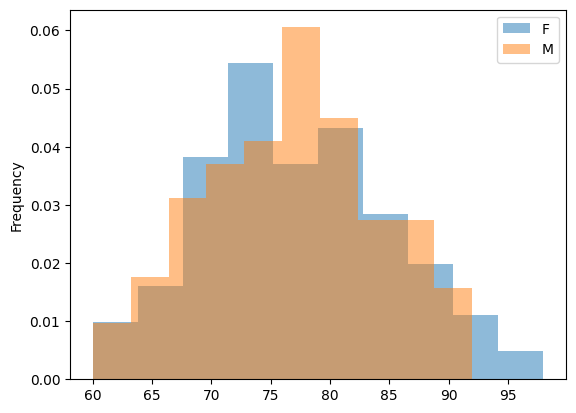

In [18]:
# Creating new dataframe with ages in accending order
age_accending_dementia = df_alhz_long.sort_values('Age')
age_accending_dementia = age_accending_dementia[age_accending_dementia.Group == "Demented"]
age_accending.groupby("M/F").Age.plot.hist(alpha=.5, density=True, legend=True, xlabel='Age of Indv. with Dementia')

In [20]:
# Read in the cross-sectional data and take a peek
df_alhz_cross = pd.read_csv('./data/oasis_cross-sectional.csv')
df_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [21]:
df_alhz_cross.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object